In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [3]:
import os
import cv2
from PIL import Image
import numpy as np

In [4]:
image_directory = 'ecg_scalogram_dataset/'
SIZE = 227
dataset = []  
label = []  #Place holders to define add labels. We will add 0 to all arr images, 1 to chf and 2 for nsr.

In [5]:
arr_images = os.listdir(image_directory + 'arr/')
for i, image_name in enumerate(arr_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'arr/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)
        
chf_images = os.listdir(image_directory + 'chf/')
for i, image_name in enumerate(chf_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'chf/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)
        
nsr_images = os.listdir(image_directory + 'nsr/')
for i, image_name in enumerate(nsr_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'nsr/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(2)

In [6]:
dataset = np.array(dataset)
label = np.array(label)

In [7]:
dataset

array([[[[215,   2,   0],
         [200,   0,   0],
         [181,   0,   0],
         ...,
         [160,   0,   0],
         [160,   0,   0],
         [160,   0,   0]],

        [[215,   2,   0],
         [202,   0,   0],
         [181,   0,   0],
         ...,
         [162,   0,   0],
         [160,   0,   0],
         [162,   0,   0]],

        [[217,   2,   1],
         [203,   0,   0],
         [183,   0,   0],
         ...,
         [162,   0,   0],
         [162,   0,   0],
         [163,   0,   0]],

        ...,

        [[198,   0,   1],
         [198,   0,   1],
         [198,   0,   1],
         ...,
         [230,   0,   0],
         [230,   0,   0],
         [230,   0,   0]],

        [[198,   0,   1],
         [198,   0,   1],
         [198,   0,   1],
         ...,
         [232,   0,   0],
         [232,   0,   0],
         [232,   0,   0]],

        [[198,   0,   1],
         [198,   0,   1],
         [198,   0,   1],
         ...,
         [232,   0,   0],
        

In [8]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.30, random_state = 0)

In [10]:
#Without scaling (normalize) the training may not converge. 
#Normalization is a rescaling of the data from the original range 
#so that all values are within the range of 0 and 1.
from keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [11]:
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))  

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',             #also try adam, rmsprop
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 16)      448       
                                                                 
 activation (Activation)     (None, 225, 225, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                   

In [13]:
import time
t1=time.time()

history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 20,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

t2=time.time()
print(t2-t1)

Epoch 1/20
10/10 [==============================] - 16s 1s/step - loss: 1.0992 - accuracy: 0.3873 - val_loss: 1.0308 - val_accuracy: 0.5222
Epoch 2/20
10/10 [==============================] - 13s 1s/step - loss: 0.8948 - accuracy: 0.5968 - val_loss: 0.8190 - val_accuracy: 0.6481
Epoch 3/20
10/10 [==============================] - 13s 1s/step - loss: 0.7453 - accuracy: 0.6635 - val_loss: 0.6562 - val_accuracy: 0.6704
Epoch 4/20
10/10 [==============================] - 13s 1s/step - loss: 0.6167 - accuracy: 0.7190 - val_loss: 0.5633 - val_accuracy: 0.7407
Epoch 5/20
10/10 [==============================] - 14s 1s/step - loss: 0.5172 - accuracy: 0.7651 - val_loss: 0.4556 - val_accuracy: 0.8148
Epoch 6/20
10/10 [==============================] - 13s 1s/step - loss: 0.4423 - accuracy: 0.8095 - val_loss: 0.3684 - val_accuracy: 0.8296
Epoch 7/20
10/10 [==============================] - 14s 1s/step - loss: 0.3172 - accuracy: 0.8651 - val_loss: 0.3141 - val_accuracy: 0.8519
Epoch 8/20
10/10 [==

In [14]:
model.save('scalogram_cnn_model_20epochs_70_30.h5')  

C:\Users\S.A.N\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


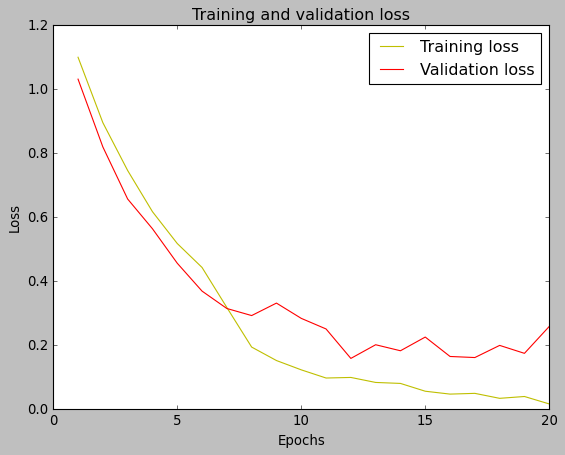

In [15]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

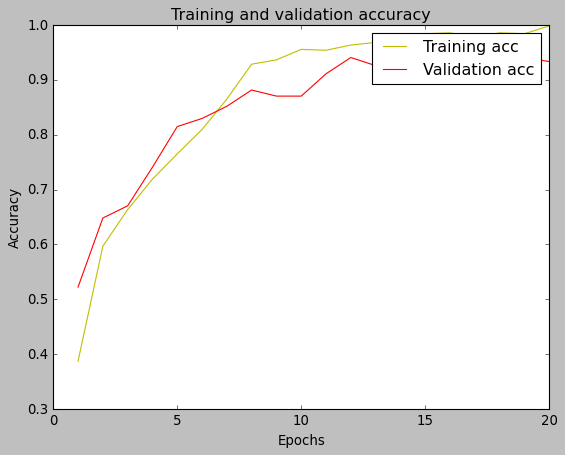

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 209ms/step
The prediction for this image is:  [[9.9595284e-01 3.7434150e-03 3.0375901e-04]]
The actual label for this image is:  0


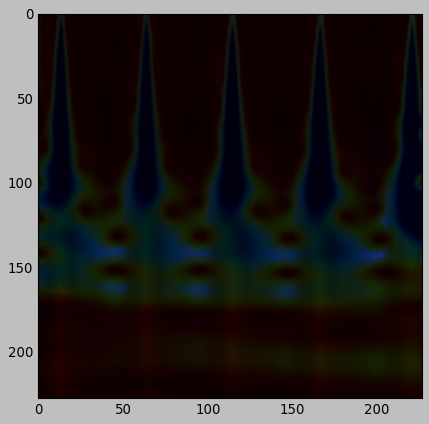

In [17]:
n=20  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

In [18]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

9/9 [==============================] - 1s 125ms/step - loss: 0.2580 - accuracy: 0.9333
Accuracy =  93.33333373069763 %


In [19]:
y_pred = model.predict(X_test)

9/9 [==============================] - 1s 125ms/step


In [20]:
y_pred1 = np.argmax(y_pred, axis=1)

In [21]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        86
           1       0.93      0.92      0.93        90
           2       0.91      0.99      0.95        94

    accuracy                           0.93       270
   macro avg       0.94      0.93      0.93       270
weighted avg       0.93      0.93      0.93       270



In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[76  5  5]
 [ 3 83  4]
 [ 0  1 93]]


In [23]:
accuracy_score(y_test, y_pred1)

0.9333333333333333

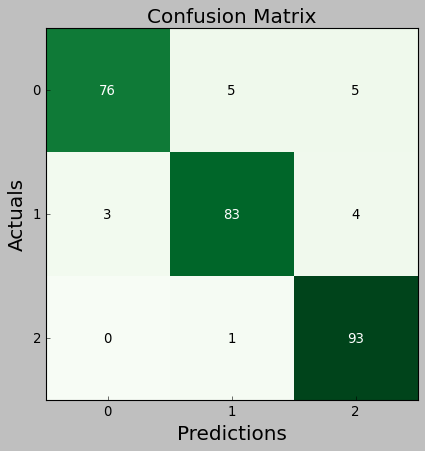

In [24]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()